In [1]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install 'qiskit-aqua[cplex]'
!pip install 'qiskit-optimization[cplex]'
!pip install 'qiskit-aer-gpu'
from qiskit import QuantumRegister, ClassicalRegister, Aer, BasicAer, QuantumCircuit, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator,StatevectorSimulator
from qiskit.visualization import plot_state_city,circuit_drawer
from qiskit.quantum_info import Statevector
import numpy as np

     |████████████████████████████████| 6.5 MB 4.5 MB/s 
     |████████████████████████████████| 18.0 MB 286 kB/s 
     |████████████████████████████████| 240 kB 46.2 MB/s 
     |████████████████████████████████| 200 kB 47.1 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 112 kB 45.6 MB/s 
     |████████████████████████████████| 1.6 MB 37.1 MB/s 
     |████████████████████████████████| 943 kB 41.0 MB/s 
     |████████████████████████████████| 37.5 MB 1.5 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 4.0 MB 35.7 MB/s 
     |████████████████████████████████| 113 kB 48.2 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.1-py3-none-any.whl size=11887 sha256=802e68177b6774be05dcd983f185f713a2d8c577619674535fc0383efbd3e5e6
  Stored in directory: /root/.cache/pip/whee

**Quantum Circuit for S-box of GIFT**


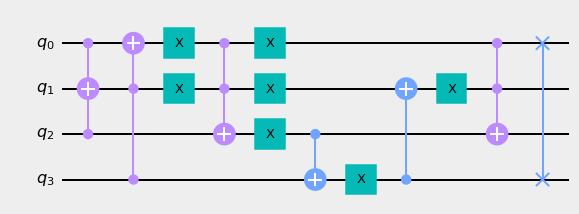

In [31]:
# SBox = [1,a,4,c,6,f,3,9,2,d,b,7,5,0,8,e]
SBox_size = 4
qreg = QuantumRegister(SBox_size, 'q')
circuit = QuantumCircuit(qreg)
circuit.ccx(qreg[0], qreg[2], qreg[1])
circuit.ccx(qreg[3], qreg[1], qreg[0])
circuit.x(qreg[0])
circuit.x(qreg[1])
circuit.ccx(qreg[0], qreg[1], qreg[2])
circuit.x(qreg[0])
circuit.x(qreg[1])
circuit.x(qreg[2])
circuit.cx(qreg[2], qreg[3])
circuit.x(qreg[3])
circuit.cx(qreg[3], qreg[1])
circuit.x(qreg[1])
circuit.ccx(qreg[0], qreg[1], qreg[2])
circuit.swap(qreg[0],qreg[3])

circuit_drawer(circuit, output='mpl', style={'backgroundcolor': '#EEEEEE'},plot_barriers=False,fold=80,justify="left",vertical_compression="high")

**Quantum Circuit for Permutation of smallGIFT**

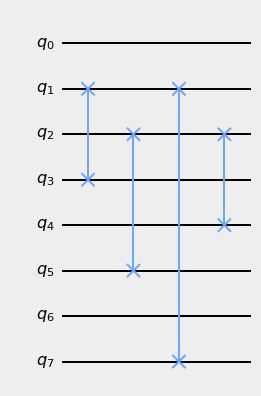

In [35]:
#PBox = [0,3,5,7,2,4,6,1]
block_size = 8
qreg = QuantumRegister(block_size, 'q')
circuit = QuantumCircuit(qreg)
circuit.swap(qreg[1], qreg[3])
circuit.swap(qreg[1], qreg[7])
circuit.swap(qreg[2], qreg[5])
circuit.swap(qreg[2], qreg[4])

circuit_drawer(circuit, output='mpl', style={'backgroundcolor': '#EEEEEE'},plot_barriers=False,fold=80,justify="left",vertical_compression="high")

**Quantum Circuit for Encryption Algorithm of smallGIFT**

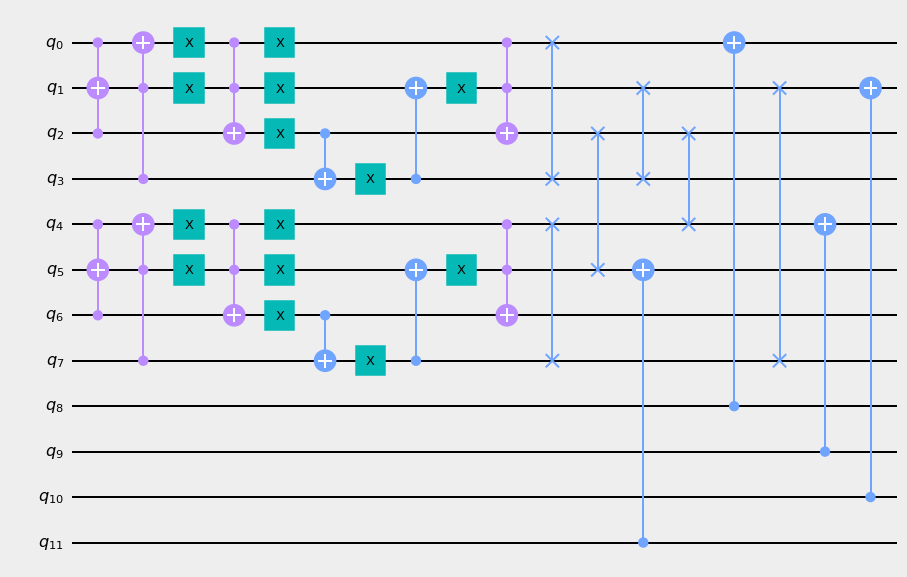

In [33]:
block_size = 8
key_size = 4
qreg = QuantumRegister(block_size + key_size, 'q')
circuit = QuantumCircuit(qreg)

#############First S-box#################
circuit.ccx(qreg[0], qreg[2], qreg[1])
circuit.ccx(qreg[3], qreg[1], qreg[0])
circuit.x(qreg[0])
circuit.x(qreg[1])
circuit.ccx(qreg[0], qreg[1], qreg[2])
circuit.x(qreg[0])
circuit.x(qreg[1])
circuit.x(qreg[2])
circuit.cx(qreg[2], qreg[3])
circuit.x(qreg[3])
circuit.cx(qreg[3], qreg[1])
circuit.x(qreg[1])
circuit.ccx(qreg[0], qreg[1], qreg[2])
circuit.swap(qreg[0],qreg[3])

#############Second S-box#################
circuit.ccx(qreg[4+0], qreg[4+2], qreg[4+1])
circuit.ccx(qreg[4+3], qreg[4+1], qreg[4+0])
circuit.x(qreg[4+0])
circuit.x(qreg[4+1])
circuit.ccx(qreg[4+0], qreg[4+1], qreg[4+2])
circuit.x(qreg[4+0])
circuit.x(qreg[4+1])
circuit.x(qreg[4+2])
circuit.cx(qreg[4+2], qreg[4+3])
circuit.x(qreg[4+3])
circuit.cx(qreg[4+3], qreg[4+1])
circuit.x(qreg[4+1])
circuit.ccx(qreg[4+0], qreg[4+1], qreg[4+2])
circuit.swap(qreg[4+0],qreg[4+3])

#############Permutation#################
circuit.swap(qreg[1], qreg[3])
circuit.swap(qreg[1], qreg[7])
circuit.swap(qreg[2], qreg[5])
circuit.swap(qreg[2], qreg[4])

#############Key Addition#################
circuit.cx(qreg[8],qreg[0])
circuit.cx(qreg[9],qreg[4])
circuit.cx(qreg[10],qreg[1])
circuit.cx(qreg[11],qreg[5])

circuit_drawer(circuit, output='mpl', style={'backgroundcolor': '#EEEEEE'},plot_barriers=False,fold=80,justify="left",vertical_compression="high")

**Quantum Circuit for Decryption Algorithm of smallGIFT**

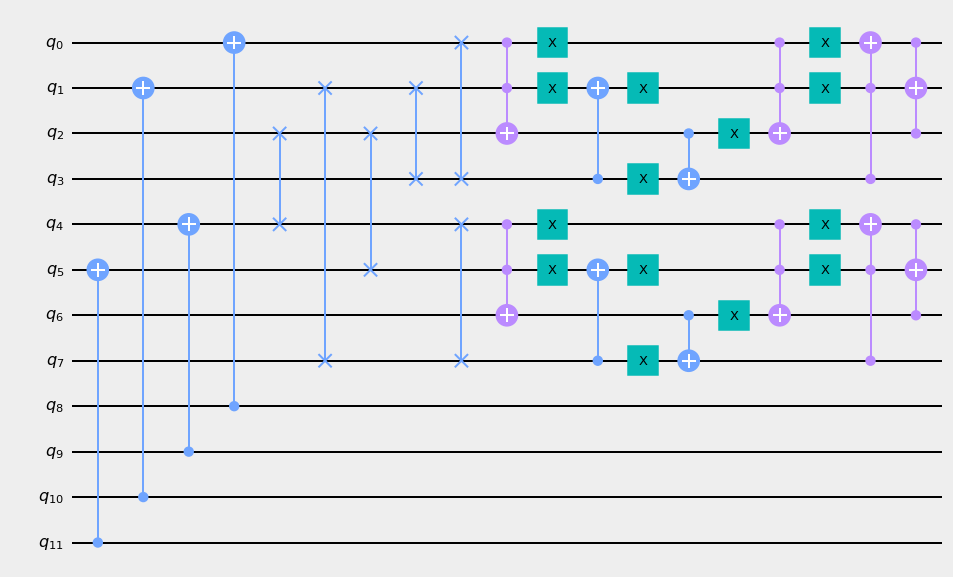

In [34]:
block_size = 8
key_size = 4
qreg = QuantumRegister(block_size + key_size, 'q')
circuit = QuantumCircuit(qreg)

#############Key Addition#################
circuit.cx(qreg[11],qreg[5])
circuit.cx(qreg[10],qreg[1])
circuit.cx(qreg[9],qreg[4])
circuit.cx(qreg[8],qreg[0])

#############Permutation#################
circuit.swap(qreg[2], qreg[4])
circuit.swap(qreg[2], qreg[5])
circuit.swap(qreg[1], qreg[7])
circuit.swap(qreg[1], qreg[3])

circuit.barrier(range(8))

#############First S-box#################
circuit.swap(qreg[0],qreg[3])
circuit.ccx(qreg[0], qreg[1], qreg[2])
circuit.x(qreg[1])
circuit.cx(qreg[3], qreg[1])
circuit.x(qreg[3])
circuit.cx(qreg[2], qreg[3])
circuit.x(qreg[2])
circuit.x(qreg[1])
circuit.x(qreg[0])
circuit.ccx(qreg[0], qreg[1], qreg[2])
circuit.x(qreg[1])
circuit.x(qreg[0])
circuit.ccx(qreg[3], qreg[1], qreg[0])
circuit.ccx(qreg[0], qreg[2], qreg[1])

#############SecondS-box#################
circuit.swap(qreg[4+0],qreg[4+3])
circuit.ccx(qreg[4+0], qreg[4+1], qreg[4+2])
circuit.x(qreg[4+1])
circuit.cx(qreg[4+3], qreg[4+1])
circuit.x(qreg[4+3])
circuit.cx(qreg[4+2], qreg[4+3])
circuit.x(qreg[4+2])
circuit.x(qreg[4+1])
circuit.x(qreg[4+0])
circuit.ccx(qreg[4+0], qreg[4+1], qreg[4+2])
circuit.x(qreg[4+1])
circuit.x(qreg[4+0])
circuit.ccx(qreg[4+3], qreg[4+1], qreg[4+0])
circuit.ccx(qreg[4+0], qreg[4+2], qreg[4+1])

circuit_drawer(circuit, output='mpl', style={'backgroundcolor': '#EEEEEE'},plot_barriers=False,fold=80,justify="left",vertical_compression="high")

**Quantum Circuit for Differential Characteristics Search**

In [2]:
def q_diff_attack(diff_bits="00000001",diff_fix="yes",rounds=1,reset=False,block_size=8,Perm=(0,3,5,7,2,4,6,1)):
  if (diff_fix != "yes"):
    qreg_q = QuantumRegister(block_size*3, 'q')
    creg_c = ClassicalRegister(block_size*2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)
    circuit.initialize(Statevector.from_label("".join(map(str,np.random.randint(2, size=block_size)))), circuit.qubits[block_size*2:])
    for i in range(0,block_size):
        circuit.cx(qreg_q[i+(block_size*2)],qreg_q[i+(block_size)]);

  if (diff_fix == "yes"):
    qreg_q = QuantumRegister(block_size*2, 'q')
    creg_c = ClassicalRegister(block_size, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)
    for i in range(0,block_size):
      if(diff_bits[block_size-1-i]=="1"):
        circuit.x(qreg_q[i+block_size]);

  for round in range(0,rounds):

    for i in range(0,block_size,4):

      for j in range(0,4):   
        if (reset==True and round!=0):
          circuit.reset(qreg_q[i+j]);
        circuit.h(qreg_q[i+j]);

      for k in range(0,4):
        circuit.cx(qreg_q[i+k],qreg_q[i+k+block_size])
      ##########First S-box############
      circuit.ccx(qreg_q[i+0], qreg_q[i+2], qreg_q[i+1])
      circuit.ccx(qreg_q[i+3], qreg_q[i+1], qreg_q[i+0])
      circuit.x(qreg_q[i+0])
      circuit.x(qreg_q[i+1])
      circuit.ccx(qreg_q[i+0], qreg_q[i+1], qreg_q[i+2])
      circuit.x(qreg_q[i+0])
      circuit.x(qreg_q[i+1])
      circuit.x(qreg_q[i+2])
      circuit.cx(qreg_q[i+2], qreg_q[i+3])
      circuit.x(qreg_q[i+3])
      circuit.cx(qreg_q[i+3], qreg_q[i+1])
      circuit.x(qreg_q[i+1])
      circuit.ccx(qreg_q[i+0], qreg_q[i+1], qreg_q[i+2])
      
      #########Second S-box############
      circuit.ccx(qreg_q[i+0+block_size], qreg_q[i+2+block_size], qreg_q[i+1+block_size])
      circuit.ccx(qreg_q[i+3+block_size], qreg_q[i+1+block_size], qreg_q[i+0+block_size])
      circuit.x(qreg_q[i+0+block_size])
      circuit.x(qreg_q[i+1+block_size])
      circuit.ccx(qreg_q[i+0+block_size], qreg_q[i+1+block_size], qreg_q[i+2+block_size])
      circuit.x(qreg_q[i+0+block_size])
      circuit.x(qreg_q[i+1+block_size])
      circuit.x(qreg_q[i+2+block_size])
      circuit.cx(qreg_q[i+2+block_size], qreg_q[i+3+block_size])
      circuit.x(qreg_q[i+3+block_size])
      circuit.cx(qreg_q[i+3+block_size], qreg_q[i+1+block_size])
      circuit.x(qreg_q[i+1+block_size])
      circuit.ccx(qreg_q[i+0+block_size], qreg_q[i+1+block_size], qreg_q[i+2+block_size])
      
      for m in range(0,4):
        circuit.cx(qreg_q[i+m],qreg_q[i+m+block_size])
      
      circuit.swap(qreg_q[i+0+block_size],qreg_q[i+3+block_size])
      
    for p in range(0,block_size*2):
        circuit.barrier(qreg_q[p])
      
    circuit.swap(qreg_q[1+block_size], qreg_q[3+block_size])
    circuit.swap(qreg_q[1+block_size], qreg_q[7+block_size])
    circuit.swap(qreg_q[2+block_size], qreg_q[5+block_size])
    circuit.swap(qreg_q[2+block_size], qreg_q[4+block_size])
    for p in range(0,block_size*2):
        circuit.barrier(qreg_q[p])
 
  if (diff_fix != "yes"):
    for i in range(0,block_size*2):
        if (i<block_size):
          circuit.measure(qreg_q[block_size+i],creg_c[i+block_size])
        else:
          circuit.measure(qreg_q[block_size+i],creg_c[i-block_size])
  if (diff_fix == "yes"):
    for i in range(0,block_size):
      circuit.measure(qreg_q[block_size+i],creg_c[i])
  return circuit

**Quantum Circuit for Differential Characteristics Search for 3-round smallGift with a fix input differece 0x01**

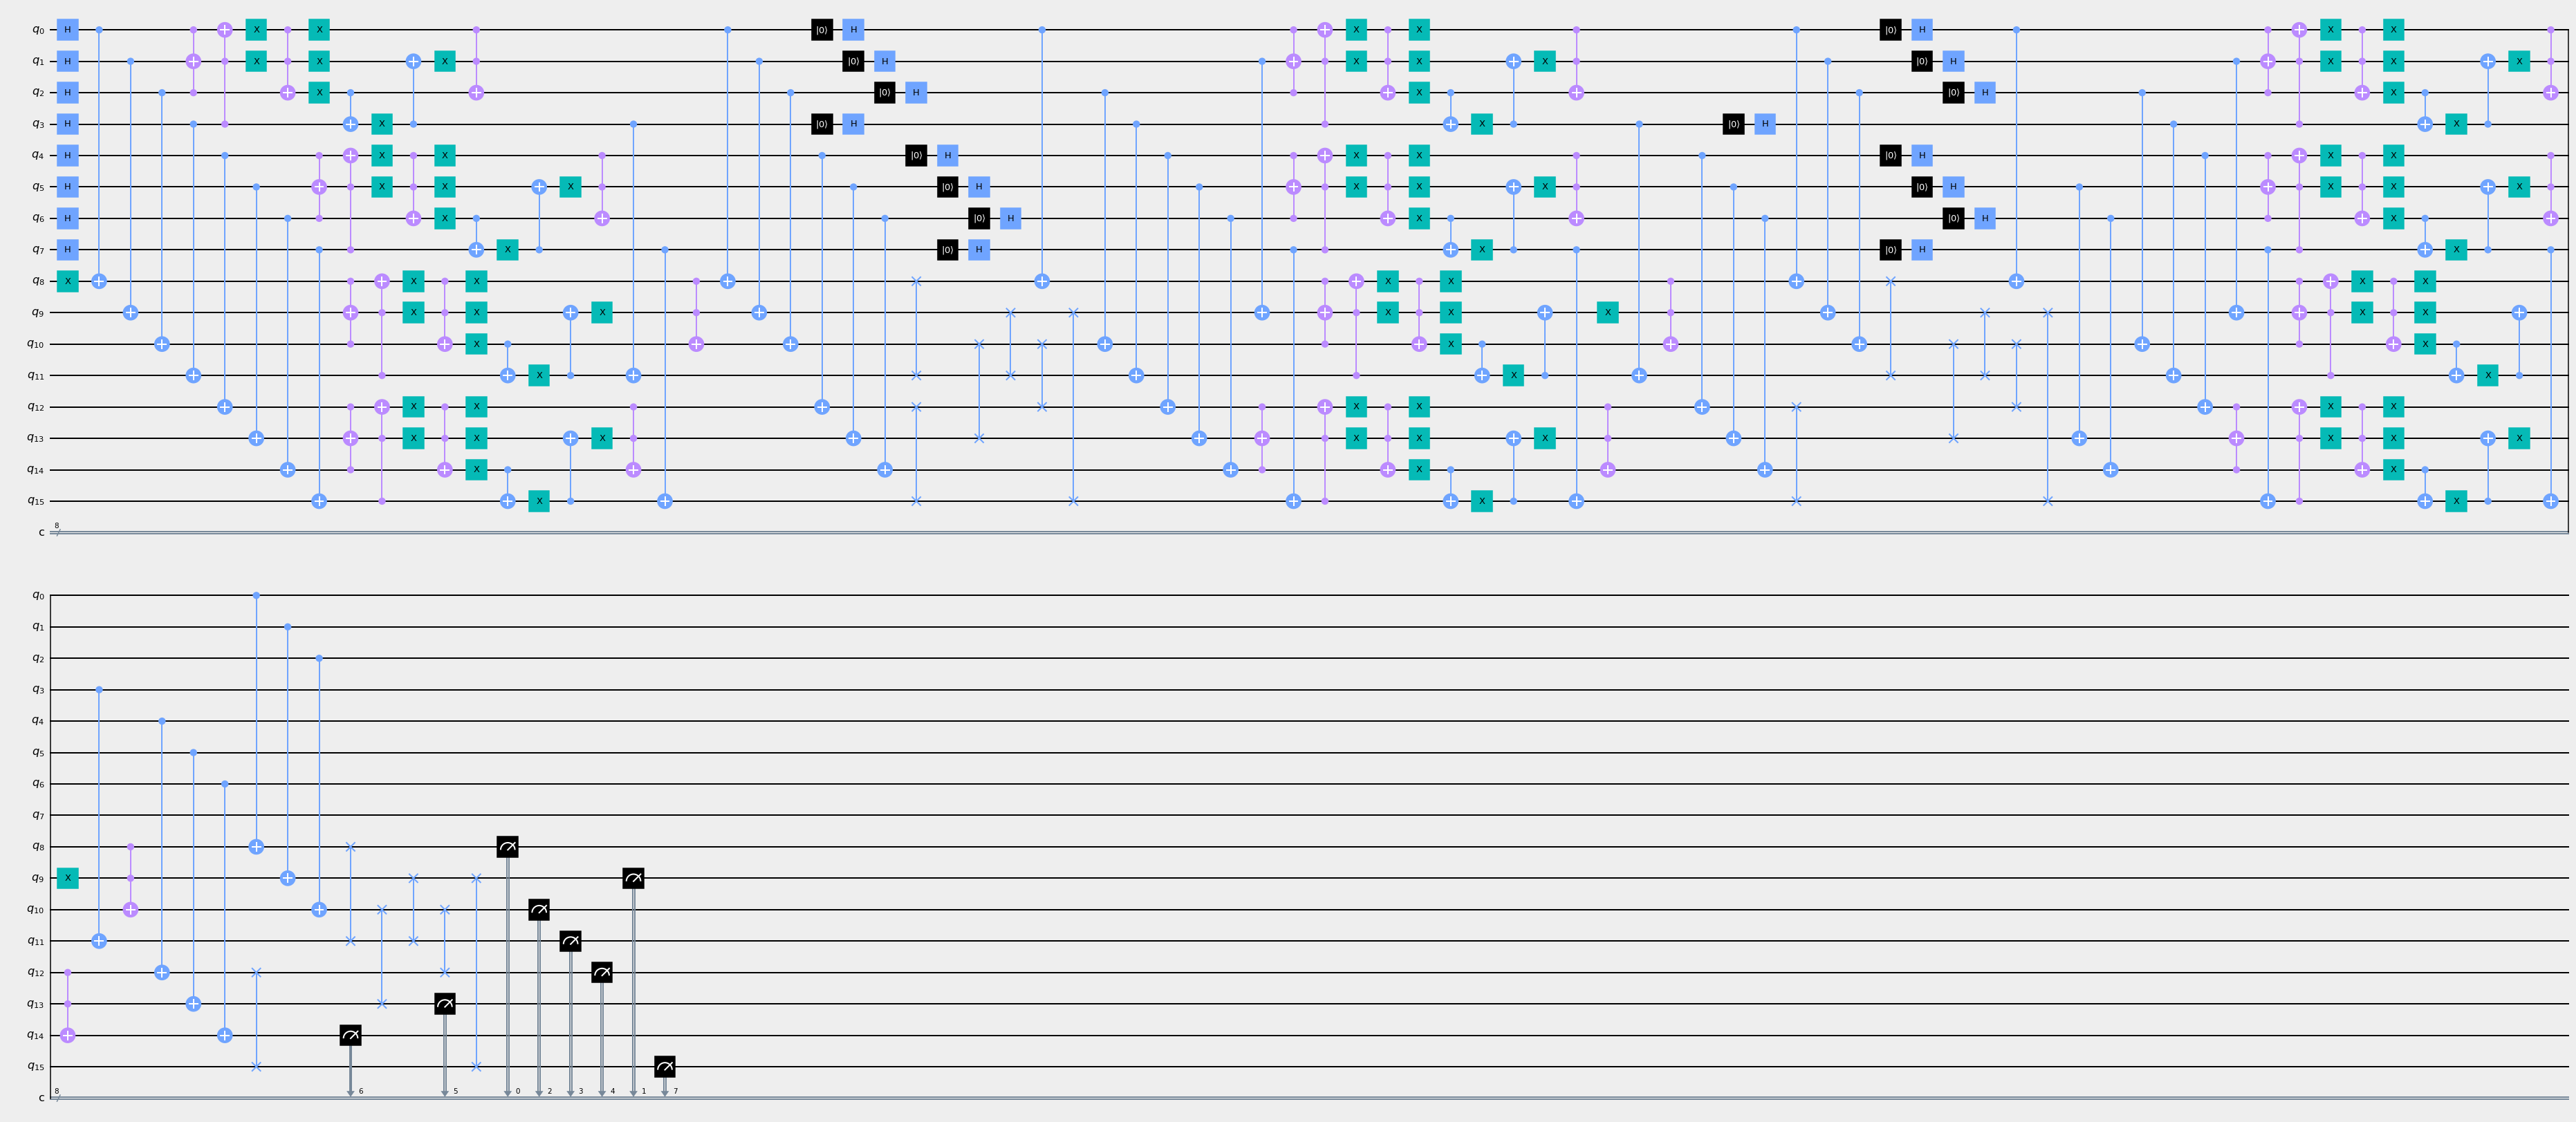

In [3]:
circuit = q_diff_attack(diff_bits="00000001",diff_fix="yes",rounds=3,reset=True,block_size=8,Perm=(0,3,5,7,2,4,6,1)) 
circuit_drawer(circuit, output='mpl', style={'backgroundcolor': '#EEEEEE'},plot_barriers=False,fold=80,justify="left",vertical_compression="high")

**Execution of Quantum Circuit for Differential Characteristics Search for 3-round smallGift with a fix input differece 0x01**

In [8]:
Permutation = (0,3,5,7,2,4,6,1)
backend = QasmSimulator(device="GPU")  # or "CPU"
circuit = q_diff_attack(diff_bits="00000001",diff_fix="yes",rounds=3,reset=True,block_size=8,Perm=Permutation) # If diff_fix is no then all input difference will be explored
#circuit_drawer(circuit, output='mpl', style={'backgroundcolor': '#EEEEEE'},plot_barriers=False,fold=80,justify="left",vertical_compression="high")
job = execute(circuit, backend, shots=10000);
result_sim = job.result()
counts = result_sim.get_counts();
#plot_histogram(counts)
####################To get Probabilities##############################################
#print(dict(sorted(counts.items(), key=lambda item: item[1], reverse=True)))
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[0], reverse=False))
prob_dict = {}
for k, v in sorted_counts.items():
    prob_dict[int(k,2)] = v / sum(sorted_counts.values())
#print(prob_dict)  # Probabilities
print(dict(sorted(prob_dict.items(), key=lambda item: item[1], reverse=True)))  # Sorted Historgram Probabilties

{41: 0.0123, 9: 0.011, 86: 0.0105, 127: 0.01, 95: 0.0097, 33: 0.0091, 76: 0.008, 11: 0.0078, 48: 0.0078, 119: 0.0078, 74: 0.0071, 75: 0.007, 195: 0.0069, 98: 0.0067, 107: 0.0067, 30: 0.0065, 114: 0.0065, 24: 0.0064, 34: 0.0064, 8: 0.0063, 163: 0.0062, 54: 0.0061, 94: 0.0061, 112: 0.006, 215: 0.006, 14: 0.0059, 43: 0.0059, 50: 0.0059, 118: 0.0059, 129: 0.0059, 26: 0.0058, 10: 0.0057, 79: 0.0057, 90: 0.0057, 151: 0.0057, 25: 0.0056, 63: 0.0056, 100: 0.0056, 102: 0.0056, 204: 0.0056, 222: 0.0056, 57: 0.0055, 82: 0.0055, 158: 0.0055, 200: 0.0055, 247: 0.0055, 92: 0.0054, 96: 0.0054, 31: 0.0053, 35: 0.0053, 38: 0.0053, 78: 0.0053, 17: 0.0052, 88: 0.0052, 131: 0.0052, 234: 0.0052, 23: 0.0051, 71: 0.0051, 93: 0.0051, 77: 0.005, 109: 0.005, 159: 0.005, 171: 0.005, 12: 0.0049, 28: 0.0048, 202: 0.0048, 15: 0.0047, 16: 0.0047, 36: 0.0047, 49: 0.0047, 73: 0.0047, 254: 0.0047, 70: 0.0046, 72: 0.0046, 147: 0.0046, 170: 0.0046, 243: 0.0046, 27: 0.0045, 47: 0.0045, 55: 0.0045, 59: 0.0045, 103: 0.0045,

In [9]:
print(prob_dict)

{1: 0.001, 2: 0.0031, 3: 0.0043, 4: 0.0015, 5: 0.0042, 6: 0.0009, 7: 0.0028, 8: 0.0063, 9: 0.011, 10: 0.0057, 11: 0.0078, 12: 0.0049, 13: 0.0042, 14: 0.0059, 15: 0.0047, 16: 0.0047, 17: 0.0052, 18: 0.0018, 19: 0.0036, 21: 0.003, 22: 0.0026, 23: 0.0051, 24: 0.0064, 25: 0.0056, 26: 0.0058, 27: 0.0045, 28: 0.0048, 29: 0.0021, 30: 0.0065, 31: 0.0053, 32: 0.0028, 33: 0.0091, 34: 0.0064, 35: 0.0053, 36: 0.0047, 37: 0.0031, 38: 0.0053, 39: 0.004, 41: 0.0123, 42: 0.0028, 43: 0.0059, 44: 0.0017, 45: 0.0033, 46: 0.0019, 47: 0.0045, 48: 0.0078, 49: 0.0047, 50: 0.0059, 51: 0.003, 52: 0.0039, 53: 0.002, 54: 0.0061, 55: 0.0045, 56: 0.003, 57: 0.0055, 58: 0.0012, 59: 0.0045, 60: 0.0005, 61: 0.0015, 62: 0.0031, 63: 0.0056, 64: 0.0044, 65: 0.0033, 66: 0.0037, 67: 0.004, 68: 0.004, 69: 0.004, 70: 0.0046, 71: 0.0051, 72: 0.0046, 73: 0.0047, 74: 0.0071, 75: 0.007, 76: 0.008, 77: 0.005, 78: 0.0053, 79: 0.0057, 81: 0.0024, 82: 0.0055, 83: 0.0044, 85: 0.0034, 86: 0.0105, 87: 0.0041, 88: 0.0052, 89: 0.0033, 9

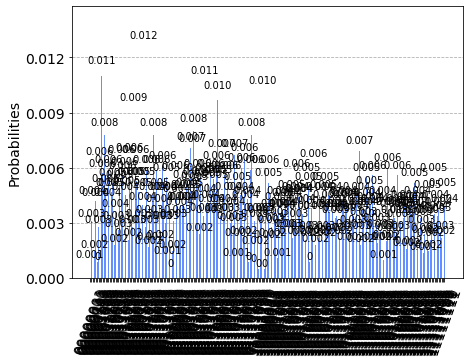

In [10]:
plot_histogram(counts)

**Results:**

In [ ]:
{41: 0.011, 86: 0.0101, 127: 0.0097, 9: 0.0088, 95: 0.0084, 54: 0.0081, 74: 0.0081, 11: 0.0079, 34: 0.0079, 33: 0.0078, 77: 0.0078, 107: 0.0076, 119: 0.0076, 94: 0.0074, 222: 0.0074, 102: 0.0073, 98: 0.0072, 30: 0.0071, 118: 0.0071, 100: 0.007, 72: 0.0069, 78: 0.0067, 109: 0.0065, 50: 0.0064, 75: 0.0064, 47: 0.0063, 43: 0.0062, 63: 0.0062, 67: 0.0062, 161: 0.0062, 48: 0.0061, 112: 0.0061, 116: 0.0061, 114: 0.006, 16: 0.0059, 202: 0.0059, 151: 0.0058, 52: 0.0057, 76: 0.0057, 96: 0.0056, 12: 0.0055, 129: 0.0053, 182: 0.0053, 215: 0.0053, 14: 0.0052, 70: 0.0052, 123: 0.0052, 247: 0.0052, 26: 0.0051, 38: 0.0051, 59: 0.0051, 254: 0.0051, 8: 0.005, 10: 0.005, 17: 0.005, 25: 0.005, 57: 0.005, 155: 0.005, 158: 0.005, 227: 0.005, 24: 0.0049, 163: 0.0049, 183: 0.0049, 195: 0.0049, 28: 0.0048, 234: 0.0048, 236: 0.0048, 65: 0.0047, 81: 0.0047, 87: 0.0047, 88: 0.0047, 105: 0.0047, 131: 0.0047, 199: 0.0047, 235: 0.0047, 19: 0.0046, 90: 0.0046, 170: 0.0046, 171: 0.0046, 177: 0.0046, 206: 0.0046, 223: 0.0046, 23: 0.0045, 79: 0.0045, 203: 0.0045, 204: 0.0045, 31: 0.0044, 35: 0.0044, 92: 0.0044, 99: 0.0044, 233: 0.0044, 239: 0.0044, 138: 0.0043, 147: 0.0043, 152: 0.0043, 179: 0.0043, 185: 0.0043, 225: 0.0043, 27: 0.0042, 111: 0.0042, 145: 0.0042, 159: 0.0042, 187: 0.0042, 238: 0.0042, 3: 0.0041, 7: 0.0041, 45: 0.0041, 66: 0.0041, 73: 0.0041, 133: 0.0041, 139: 0.0041, 184: 0.0041, 197: 0.0041, 231: 0.0041, 2: 0.004, 36: 0.004, 140: 0.004, 15: 0.0039, 64: 0.0039, 71: 0.0039, 144: 0.0039, 186: 0.0039, 89: 0.0038, 93: 0.0038, 153: 0.0038, 250: 0.0038, 5: 0.0037, 13: 0.0037, 39: 0.0037, 218: 0.0037, 246: 0.0037, 113: 0.0036, 141: 0.0036, 190: 0.0036, 214: 0.0036, 216: 0.0036, 51: 0.0035, 82: 0.0035, 150: 0.0035, 200: 0.0035, 211: 0.0035, 229: 0.0035, 251: 0.0035, 42: 0.0034, 55: 0.0034, 97: 0.0034, 176: 0.0034, 191: 0.0034, 224: 0.0034, 232: 0.0034, 237: 0.0034, 241: 0.0034, 252: 0.0034, 69: 0.0033, 146: 0.0033, 174: 0.0033, 193: 0.0033, 219: 0.0033, 255: 0.0033, 91: 0.0032, 101: 0.0032, 106: 0.0032, 121: 0.0032, 125: 0.0032, 154: 0.0032, 168: 0.0032, 207: 0.0032, 226: 0.0032, 21: 0.0031, 49: 0.0031, 126: 0.0031, 167: 0.0031, 172: 0.0031, 178: 0.0031, 243: 0.0031, 135: 0.003, 149: 0.003, 165: 0.003, 201: 0.003, 205: 0.003, 209: 0.003, 220: 0.003, 249: 0.003, 175: 0.0029, 230: 0.0029, 62: 0.0028, 104: 0.0028, 157: 0.0028, 192: 0.0028, 194: 0.0028, 248: 0.0028, 56: 0.0027, 108: 0.0027, 156: 0.0027, 173: 0.0027, 29: 0.0026, 85: 0.0026, 103: 0.0026, 188: 0.0026, 213: 0.0026, 32: 0.0025, 68: 0.0025, 83: 0.0025, 115: 0.0025, 130: 0.0025, 142: 0.0025, 221: 0.0025, 169: 0.0024, 162: 0.0023, 46: 0.0022, 242: 0.0022, 22: 0.0021, 37: 0.0021, 137: 0.0021, 198: 0.0021, 228: 0.0021, 58: 0.002, 148: 0.002, 164: 0.002, 166: 0.002, 189: 0.002, 208: 0.002, 196: 0.0019, 217: 0.0019, 253: 0.0019, 44: 0.0018, 53: 0.0018, 110: 0.0018, 122: 0.0018, 134: 0.0018, 143: 0.0018, 240: 0.0018, 244: 0.0018, 4: 0.0017, 210: 0.0017, 61: 0.0016, 181: 0.0016, 120: 0.0015, 136: 0.0015, 132: 0.0014, 180: 0.0014, 212: 0.0014, 245: 0.0013, 1: 0.0012, 18: 0.0012, 117: 0.0011, 124: 0.0007, 160: 0.0006, 6: 0.0005, 60: 0.0005, 128: 0.0005}
{41: 0.0135, 95: 0.0104, 9: 0.0103, 86: 0.0101, 127: 0.0091, 48: 0.0089, 50: 0.0088, 33: 0.0087, 74: 0.0083, 24: 0.0074, 8: 0.0073, 54: 0.0073, 98: 0.0073, 43: 0.0072, 96: 0.0072, 10: 0.0071, 75: 0.007, 94: 0.007, 34: 0.0069, 222: 0.0069, 119: 0.0068, 15: 0.0065, 11: 0.0064, 76: 0.0064, 26: 0.0062, 63: 0.0062, 92: 0.0062, 118: 0.0062, 30: 0.0061, 234: 0.0061, 23: 0.006, 77: 0.006, 31: 0.0059, 215: 0.0059, 88: 0.0058, 64: 0.0057, 107: 0.0057, 129: 0.0056, 67: 0.0055, 79: 0.0055, 100: 0.0055, 70: 0.0054, 87: 0.0054, 19: 0.0053, 112: 0.0053, 151: 0.0053, 73: 0.0052, 78: 0.0052, 90: 0.0052, 17: 0.0051, 99: 0.0051, 202: 0.0051, 204: 0.0051, 247: 0.0051, 109: 0.005, 116: 0.005, 183: 0.005, 57: 0.0049, 225: 0.0049, 3: 0.0048, 55: 0.0048, 59: 0.0048, 71: 0.0048, 144: 0.0048, 193: 0.0048, 254: 0.0048, 7: 0.0047, 36: 0.0047, 138: 0.0047, 195: 0.0047, 201: 0.0047, 238: 0.0047, 14: 0.0046, 25: 0.0046, 114: 0.0046, 179: 0.0046, 223: 0.0046, 16: 0.0045, 72: 0.0045, 91: 0.0045, 102: 0.0045, 150: 0.0045, 190: 0.0045, 239: 0.0045, 28: 0.0044, 52: 0.0044, 113: 0.0044, 152: 0.0044, 158: 0.0044, 170: 0.0044, 49: 0.0043, 161: 0.0043, 177: 0.0043, 185: 0.0043, 206: 0.0043, 12: 0.0042, 65: 0.0042, 121: 0.0042, 163: 0.0042, 197: 0.0042, 236: 0.0042, 241: 0.0042, 69: 0.0041, 159: 0.0041, 216: 0.0041, 35: 0.004, 82: 0.004, 131: 0.004, 140: 0.004, 153: 0.004, 191: 0.004, 47: 0.0039, 105: 0.0039, 115: 0.0039, 133: 0.0039, 165: 0.0039, 194: 0.0039, 200: 0.0039, 229: 0.0039, 111: 0.0038, 174: 0.0038, 186: 0.0038, 214: 0.0038, 255: 0.0038, 2: 0.0037, 13: 0.0037, 38: 0.0037, 68: 0.0037, 93: 0.0037, 123: 0.0037, 145: 0.0037, 211: 0.0037, 227: 0.0037, 231: 0.0037, 39: 0.0036, 162: 0.0036, 246: 0.0036, 101: 0.0035, 168: 0.0035, 250: 0.0035, 51: 0.0034, 141: 0.0034, 155: 0.0034, 164: 0.0034, 27: 0.0033, 97: 0.0033, 126: 0.0033, 143: 0.0033, 187: 0.0033, 207: 0.0033, 233: 0.0033, 235: 0.0033, 251: 0.0033, 21: 0.0032, 45: 0.0032, 103: 0.0032, 171: 0.0032, 203: 0.0032, 220: 0.0032, 42: 0.0031, 62: 0.0031, 83: 0.0031, 85: 0.0031, 135: 0.0031, 167: 0.0031, 172: 0.0031, 175: 0.0031, 184: 0.0031, 192: 0.0031, 198: 0.0031, 199: 0.0031, 243: 0.0031, 29: 0.003, 89: 0.003, 139: 0.003, 142: 0.003, 147: 0.003, 166: 0.003, 209: 0.003, 219: 0.003, 5: 0.0029, 66: 0.0029, 106: 0.0029, 178: 0.0029, 232: 0.0029, 81: 0.0028, 130: 0.0028, 146: 0.0028, 148: 0.0028, 154: 0.0028, 173: 0.0028, 180: 0.0028, 205: 0.0028, 224: 0.0028, 252: 0.0028, 32: 0.0027, 149: 0.0027, 182: 0.0026, 213: 0.0026, 226: 0.0025, 230: 0.0025, 242: 0.0025, 157: 0.0024, 169: 0.0024, 176: 0.0024, 196: 0.0024, 218: 0.0024, 56: 0.0023, 108: 0.0023, 125: 0.0023, 134: 0.0023, 228: 0.0023, 237: 0.0023, 240: 0.0023, 249: 0.0023, 37: 0.0022, 44: 0.0022, 136: 0.0022, 208: 0.0022, 248: 0.0022, 61: 0.0021, 104: 0.0021, 181: 0.0021, 217: 0.0021, 221: 0.0021, 58: 0.002, 132: 0.002, 188: 0.002, 245: 0.002, 46: 0.0019, 156: 0.0019, 4: 0.0018, 120: 0.0018, 210: 0.0018, 1: 0.0017, 189: 0.0017, 253: 0.0017, 117: 0.0016, 122: 0.0016, 6: 0.0014, 212: 0.0013, 244: 0.0012, 22: 0.0011, 137: 0.0011, 110: 0.001, 128: 0.001, 18: 0.0009, 53: 0.0008, 124: 0.0007, 160: 0.0005, 60: 0.0003}
{41: 0.0134, 9: 0.0103, 86: 0.0103, 33: 0.0089, 95: 0.0089, 74: 0.0079, 127: 0.0078, 10: 0.0075, 34: 0.0075, 94: 0.0073, 98: 0.0072, 77: 0.0071, 11: 0.007, 24: 0.0067, 50: 0.0067, 112: 0.0067, 76: 0.0066, 30: 0.0065, 67: 0.0064, 75: 0.0064, 190: 0.0064, 54: 0.0063, 215: 0.0063, 27: 0.0062, 72: 0.0062, 78: 0.0062, 26: 0.0061, 8: 0.006, 247: 0.006, 254: 0.006, 48: 0.0059, 71: 0.0059, 102: 0.0059, 107: 0.0059, 199: 0.0058, 234: 0.0058, 43: 0.0057, 170: 0.0056, 36: 0.0055, 119: 0.0055, 16: 0.0054, 35: 0.0054, 79: 0.0054, 90: 0.0054, 100: 0.0054, 17: 0.0053, 65: 0.0053, 96: 0.0053, 12: 0.0052, 38: 0.0052, 116: 0.0052, 222: 0.0052, 238: 0.0052, 14: 0.0051, 45: 0.0051, 114: 0.0051, 202: 0.0051, 3: 0.005, 118: 0.005, 171: 0.005, 23: 0.0049, 28: 0.0049, 63: 0.0049, 153: 0.0049, 158: 0.0049, 159: 0.0049, 13: 0.0048, 73: 0.0048, 129: 0.0048, 204: 0.0048, 233: 0.0048, 235: 0.0048, 49: 0.0047, 109: 0.0047, 151: 0.0047, 163: 0.0047, 15: 0.0046, 25: 0.0046, 99: 0.0046, 161: 0.0046, 183: 0.0046, 195: 0.0046, 92: 0.0045, 139: 0.0045, 154: 0.0045, 177: 0.0045, 227: 0.0045, 31: 0.0044, 131: 0.0044, 138: 0.0044, 186: 0.0044, 236: 0.0044, 39: 0.0043, 47: 0.0043, 52: 0.0043, 55: 0.0043, 57: 0.0043, 59: 0.0043, 82: 0.0043, 176: 0.0043, 179: 0.0043, 223: 0.0043, 229: 0.0043, 70: 0.0042, 87: 0.0042, 200: 0.0042, 93: 0.0041, 105: 0.0041, 207: 0.0041, 209: 0.0041, 243: 0.0041, 83: 0.004, 88: 0.004, 152: 0.004, 174: 0.004, 175: 0.004, 191: 0.004, 194: 0.004, 19: 0.0039, 66: 0.0039, 133: 0.0039, 184: 0.0039, 232: 0.0039, 246: 0.0039, 5: 0.0038, 115: 0.0038, 121: 0.0038, 130: 0.0038, 143: 0.0038, 145: 0.0038, 203: 0.0038, 211: 0.0038, 216: 0.0038, 111: 0.0037, 144: 0.0037, 147: 0.0037, 185: 0.0037, 193: 0.0037, 201: 0.0037, 225: 0.0037, 69: 0.0036, 89: 0.0036, 123: 0.0036, 142: 0.0036, 197: 0.0036, 248: 0.0036, 255: 0.0036, 64: 0.0035, 68: 0.0035, 196: 0.0035, 214: 0.0035, 230: 0.0035, 113: 0.0034, 126: 0.0034, 182: 0.0034, 231: 0.0034, 241: 0.0034, 2: 0.0033, 97: 0.0033, 167: 0.0033, 188: 0.0033, 219: 0.0033, 239: 0.0033, 249: 0.0033, 37: 0.0032, 62: 0.0032, 91: 0.0032, 101: 0.0032, 172: 0.0032, 29: 0.0031, 81: 0.0031, 135: 0.0031, 218: 0.0031, 42: 0.003, 51: 0.003, 85: 0.003, 198: 0.003, 237: 0.003, 21: 0.0029, 103: 0.0029, 150: 0.0029, 173: 0.0029, 181: 0.0029, 206: 0.0029, 7: 0.0028, 141: 0.0028, 146: 0.0028, 149: 0.0028, 187: 0.0028, 192: 0.0028, 217: 0.0028, 250: 0.0028, 56: 0.0027, 136: 0.0027, 157: 0.0027, 205: 0.0027, 252: 0.0027, 58: 0.0026, 140: 0.0026, 162: 0.0025, 226: 0.0025, 228: 0.0025, 242: 0.0025, 251: 0.0025, 32: 0.0024, 104: 0.0024, 106: 0.0024, 168: 0.0024, 169: 0.0024, 134: 0.0023, 178: 0.0023, 189: 0.0023, 221: 0.0023, 46: 0.0022, 122: 0.0022, 155: 0.0022, 224: 0.0022, 245: 0.0022, 253: 0.0022, 108: 0.0021, 61: 0.002, 165: 0.002, 220: 0.002, 110: 0.0019, 125: 0.0019, 180: 0.0019, 208: 0.0019, 210: 0.0019, 4: 0.0018, 22: 0.0017, 213: 0.0017, 240: 0.0017, 44: 0.0016, 156: 0.0015, 1: 0.0014, 18: 0.0014, 53: 0.0014, 148: 0.0014, 212: 0.0014, 132: 0.0013, 166: 0.0013, 164: 0.0012, 60: 0.0011, 120: 0.0011, 160: 0.0011, 128: 0.001, 137: 0.001, 117: 0.0009, 6: 0.0008, 124: 0.0007, 244: 0.0007}
{41: 0.015, 9: 0.0109, 33: 0.01, 127: 0.0094, 95: 0.0088, 34: 0.0085, 94: 0.0085, 43: 0.0084, 86: 0.0084, 74: 0.008, 98: 0.008, 76: 0.0074, 77: 0.0072, 119: 0.0072, 54: 0.0071, 102: 0.0065, 222: 0.0065, 75: 0.0064, 118: 0.0064, 48: 0.0063, 96: 0.0063, 254: 0.0063, 67: 0.0061, 23: 0.006, 114: 0.006, 227: 0.006, 79: 0.0059, 107: 0.0059, 24: 0.0058, 30: 0.0058, 92: 0.0058, 123: 0.0058, 161: 0.0058, 99: 0.0057, 163: 0.0057, 247: 0.0057, 8: 0.0056, 10: 0.0056, 14: 0.0056, 52: 0.0056, 100: 0.0056, 109: 0.0056, 138: 0.0056, 50: 0.0055, 11: 0.0054, 31: 0.0054, 72: 0.0054, 90: 0.0054, 195: 0.0054, 16: 0.0053, 63: 0.0053, 87: 0.0053, 129: 0.0053, 70: 0.0052, 215: 0.0052, 3: 0.0051, 57: 0.0051, 82: 0.0051, 158: 0.0051, 159: 0.0051, 203: 0.0051, 78: 0.005, 25: 0.0049, 59: 0.0049, 73: 0.0049, 248: 0.0049, 26: 0.0048, 88: 0.0048, 13: 0.0047, 15: 0.0047, 111: 0.0047, 202: 0.0047, 131: 0.0046, 151: 0.0046, 234: 0.0046, 235: 0.0046, 12: 0.0045, 47: 0.0045, 170: 0.0045, 225: 0.0045, 36: 0.0044, 101: 0.0044, 112: 0.0044, 121: 0.0044, 174: 0.0044, 35: 0.0043, 45: 0.0043, 49: 0.0043, 66: 0.0043, 69: 0.0043, 105: 0.0043, 116: 0.0043, 154: 0.0043, 155: 0.0043, 162: 0.0043, 204: 0.0043, 236: 0.0043, 27: 0.0042, 103: 0.0042, 126: 0.0042, 152: 0.0042, 191: 0.0042, 231: 0.0042, 239: 0.0042, 38: 0.0041, 144: 0.0041, 177: 0.0041, 241: 0.0041, 39: 0.004, 65: 0.004, 71: 0.004, 93: 0.004, 171: 0.004, 183: 0.004, 186: 0.004, 187: 0.004, 199: 0.004, 200: 0.004, 233: 0.004, 243: 0.004, 250: 0.004, 51: 0.0039, 140: 0.0039, 176: 0.0039, 185: 0.0039, 201: 0.0039, 207: 0.0039, 229: 0.0039, 19: 0.0038, 89: 0.0038, 133: 0.0038, 135: 0.0038, 209: 0.0038, 255: 0.0038, 17: 0.0037, 64: 0.0037, 91: 0.0037, 147: 0.0037, 173: 0.0037, 193: 0.0037, 28: 0.0036, 81: 0.0036, 232: 0.0036, 251: 0.0035, 5: 0.0034, 62: 0.0034, 175: 0.0034, 190: 0.0034, 211: 0.0034, 238: 0.0034, 55: 0.0033, 68: 0.0033, 145: 0.0033, 153: 0.0033, 168: 0.0033, 179: 0.0033, 205: 0.0033, 218: 0.0033, 223: 0.0033, 113: 0.0032, 139: 0.0032, 143: 0.0032, 246: 0.0032, 2: 0.0031, 7: 0.0031, 42: 0.0031, 206: 0.0031, 165: 0.003, 182: 0.003, 197: 0.003, 217: 0.003, 228: 0.003, 252: 0.003, 29: 0.0029, 37: 0.0029, 83: 0.0029, 115: 0.0029, 142: 0.0029, 220: 0.0029, 249: 0.0029, 97: 0.0028, 149: 0.0028, 167: 0.0028, 169: 0.0028, 196: 0.0028, 224: 0.0028, 4: 0.0027, 56: 0.0027, 184: 0.0027, 32: 0.0026, 104: 0.0026, 110: 0.0026, 136: 0.0026, 141: 0.0026, 164: 0.0026, 189: 0.0026, 210: 0.0026, 214: 0.0026, 219: 0.0026, 130: 0.0025, 134: 0.0025, 150: 0.0025, 156: 0.0025, 178: 0.0025, 188: 0.0025, 226: 0.0025, 245: 0.0025, 125: 0.0024, 166: 0.0024, 213: 0.0024, 122: 0.0023, 216: 0.0023, 240: 0.0023, 21: 0.0022, 58: 0.0022, 172: 0.0022, 237: 0.0022, 242: 0.0022, 253: 0.0022, 44: 0.0021, 180: 0.0021, 221: 0.0021, 230: 0.0021, 22: 0.002, 46: 0.002, 146: 0.002, 108: 0.0019, 157: 0.0019, 192: 0.0019, 198: 0.0019, 106: 0.0017, 132: 0.0017, 194: 0.0017, 53: 0.0016, 85: 0.0016, 148: 0.0016, 61: 0.0015, 137: 0.0015, 181: 0.0015, 208: 0.0015, 244: 0.0014, 117: 0.0013, 120: 0.0013, 1: 0.0009, 18: 0.0009, 6: 0.0007, 160: 0.0007, 124: 0.0006, 128: 0.0006, 212: 0.0006, 60: 0.0005}
{41: 0.0123, 9: 0.011, 86: 0.0105, 127: 0.01, 95: 0.0097, 33: 0.0091, 76: 0.008, 11: 0.0078, 48: 0.0078, 119: 0.0078, 74: 0.0071, 75: 0.007, 195: 0.0069, 98: 0.0067, 107: 0.0067, 30: 0.0065, 114: 0.0065, 24: 0.0064, 34: 0.0064, 8: 0.0063, 163: 0.0062, 54: 0.0061, 94: 0.0061, 112: 0.006, 215: 0.006, 14: 0.0059, 43: 0.0059, 50: 0.0059, 118: 0.0059, 129: 0.0059, 26: 0.0058, 10: 0.0057, 79: 0.0057, 90: 0.0057, 151: 0.0057, 25: 0.0056, 63: 0.0056, 100: 0.0056, 102: 0.0056, 204: 0.0056, 222: 0.0056, 57: 0.0055, 82: 0.0055, 158: 0.0055, 200: 0.0055, 247: 0.0055, 92: 0.0054, 96: 0.0054, 31: 0.0053, 35: 0.0053, 38: 0.0053, 78: 0.0053, 17: 0.0052, 88: 0.0052, 131: 0.0052, 234: 0.0052, 23: 0.0051, 71: 0.0051, 93: 0.0051, 77: 0.005, 109: 0.005, 159: 0.005, 171: 0.005, 12: 0.0049, 28: 0.0048, 202: 0.0048, 15: 0.0047, 16: 0.0047, 36: 0.0047, 49: 0.0047, 73: 0.0047, 254: 0.0047, 70: 0.0046, 72: 0.0046, 147: 0.0046, 170: 0.0046, 243: 0.0046, 27: 0.0045, 47: 0.0045, 55: 0.0045, 59: 0.0045, 103: 0.0045, 111: 0.0045, 150: 0.0045, 167: 0.0045, 173: 0.0045, 193: 0.0045, 64: 0.0044, 83: 0.0044, 152: 0.0044, 153: 0.0044, 3: 0.0043, 116: 0.0043, 139: 0.0043, 184: 0.0043, 211: 0.0043, 236: 0.0043, 5: 0.0042, 13: 0.0042, 143: 0.0042, 145: 0.0042, 183: 0.0042, 185: 0.0042, 201: 0.0042, 87: 0.0041, 115: 0.0041, 172: 0.0041, 186: 0.0041, 227: 0.0041, 249: 0.0041, 39: 0.004, 67: 0.004, 68: 0.004, 69: 0.004, 138: 0.004, 203: 0.004, 231: 0.004, 233: 0.004, 52: 0.0039, 91: 0.0039, 99: 0.0039, 154: 0.0039, 190: 0.0039, 206: 0.0039, 218: 0.0039, 255: 0.0039, 161: 0.0038, 177: 0.0038, 225: 0.0038, 66: 0.0037, 105: 0.0037, 142: 0.0037, 197: 0.0037, 199: 0.0037, 216: 0.0037, 223: 0.0037, 235: 0.0037, 251: 0.0037, 19: 0.0036, 135: 0.0036, 140: 0.0036, 141: 0.0036, 174: 0.0036, 176: 0.0036, 182: 0.0036, 219: 0.0036, 229: 0.0036, 155: 0.0035, 165: 0.0035, 192: 0.0035, 232: 0.0035, 248: 0.0035, 85: 0.0034, 97: 0.0034, 101: 0.0034, 123: 0.0034, 125: 0.0034, 179: 0.0034, 187: 0.0034, 250: 0.0034, 45: 0.0033, 65: 0.0033, 89: 0.0033, 126: 0.0033, 178: 0.0033, 220: 0.0033, 226: 0.0033, 238: 0.0033, 246: 0.0033, 136: 0.0032, 198: 0.0032, 237: 0.0032, 2: 0.0031, 37: 0.0031, 62: 0.0031, 121: 0.0031, 149: 0.0031, 205: 0.0031, 224: 0.0031, 21: 0.003, 51: 0.003, 56: 0.003, 104: 0.003, 106: 0.0029, 132: 0.0029, 207: 0.0029, 7: 0.0028, 32: 0.0028, 42: 0.0028, 133: 0.0028, 191: 0.0028, 239: 0.0028, 22: 0.0026, 144: 0.0026, 146: 0.0026, 188: 0.0026, 210: 0.0026, 156: 0.0025, 168: 0.0025, 194: 0.0025, 209: 0.0025, 221: 0.0025, 252: 0.0025, 81: 0.0024, 175: 0.0024, 180: 0.0024, 217: 0.0024, 241: 0.0024, 162: 0.0023, 242: 0.0023, 113: 0.0022, 148: 0.0022, 166: 0.0022, 181: 0.0022, 253: 0.0022, 29: 0.0021, 110: 0.0021, 134: 0.0021, 157: 0.0021, 169: 0.0021, 245: 0.0021, 53: 0.002, 130: 0.002, 214: 0.002, 46: 0.0019, 189: 0.0019, 208: 0.0019, 213: 0.0019, 18: 0.0018, 164: 0.0018, 196: 0.0018, 44: 0.0017, 122: 0.0017, 230: 0.0017, 228: 0.0016, 4: 0.0015, 61: 0.0015, 244: 0.0015, 240: 0.0014, 58: 0.0012, 108: 0.0011, 137: 0.0011, 1: 0.001, 212: 0.001, 6: 0.0009, 117: 0.0009, 160: 0.0009, 120: 0.0008, 60: 0.0005, 124: 0.0005, 128: 0.0005}


**Quantum Circuit for Differential Characteristics Search for 3-round smallGift for all input differences**

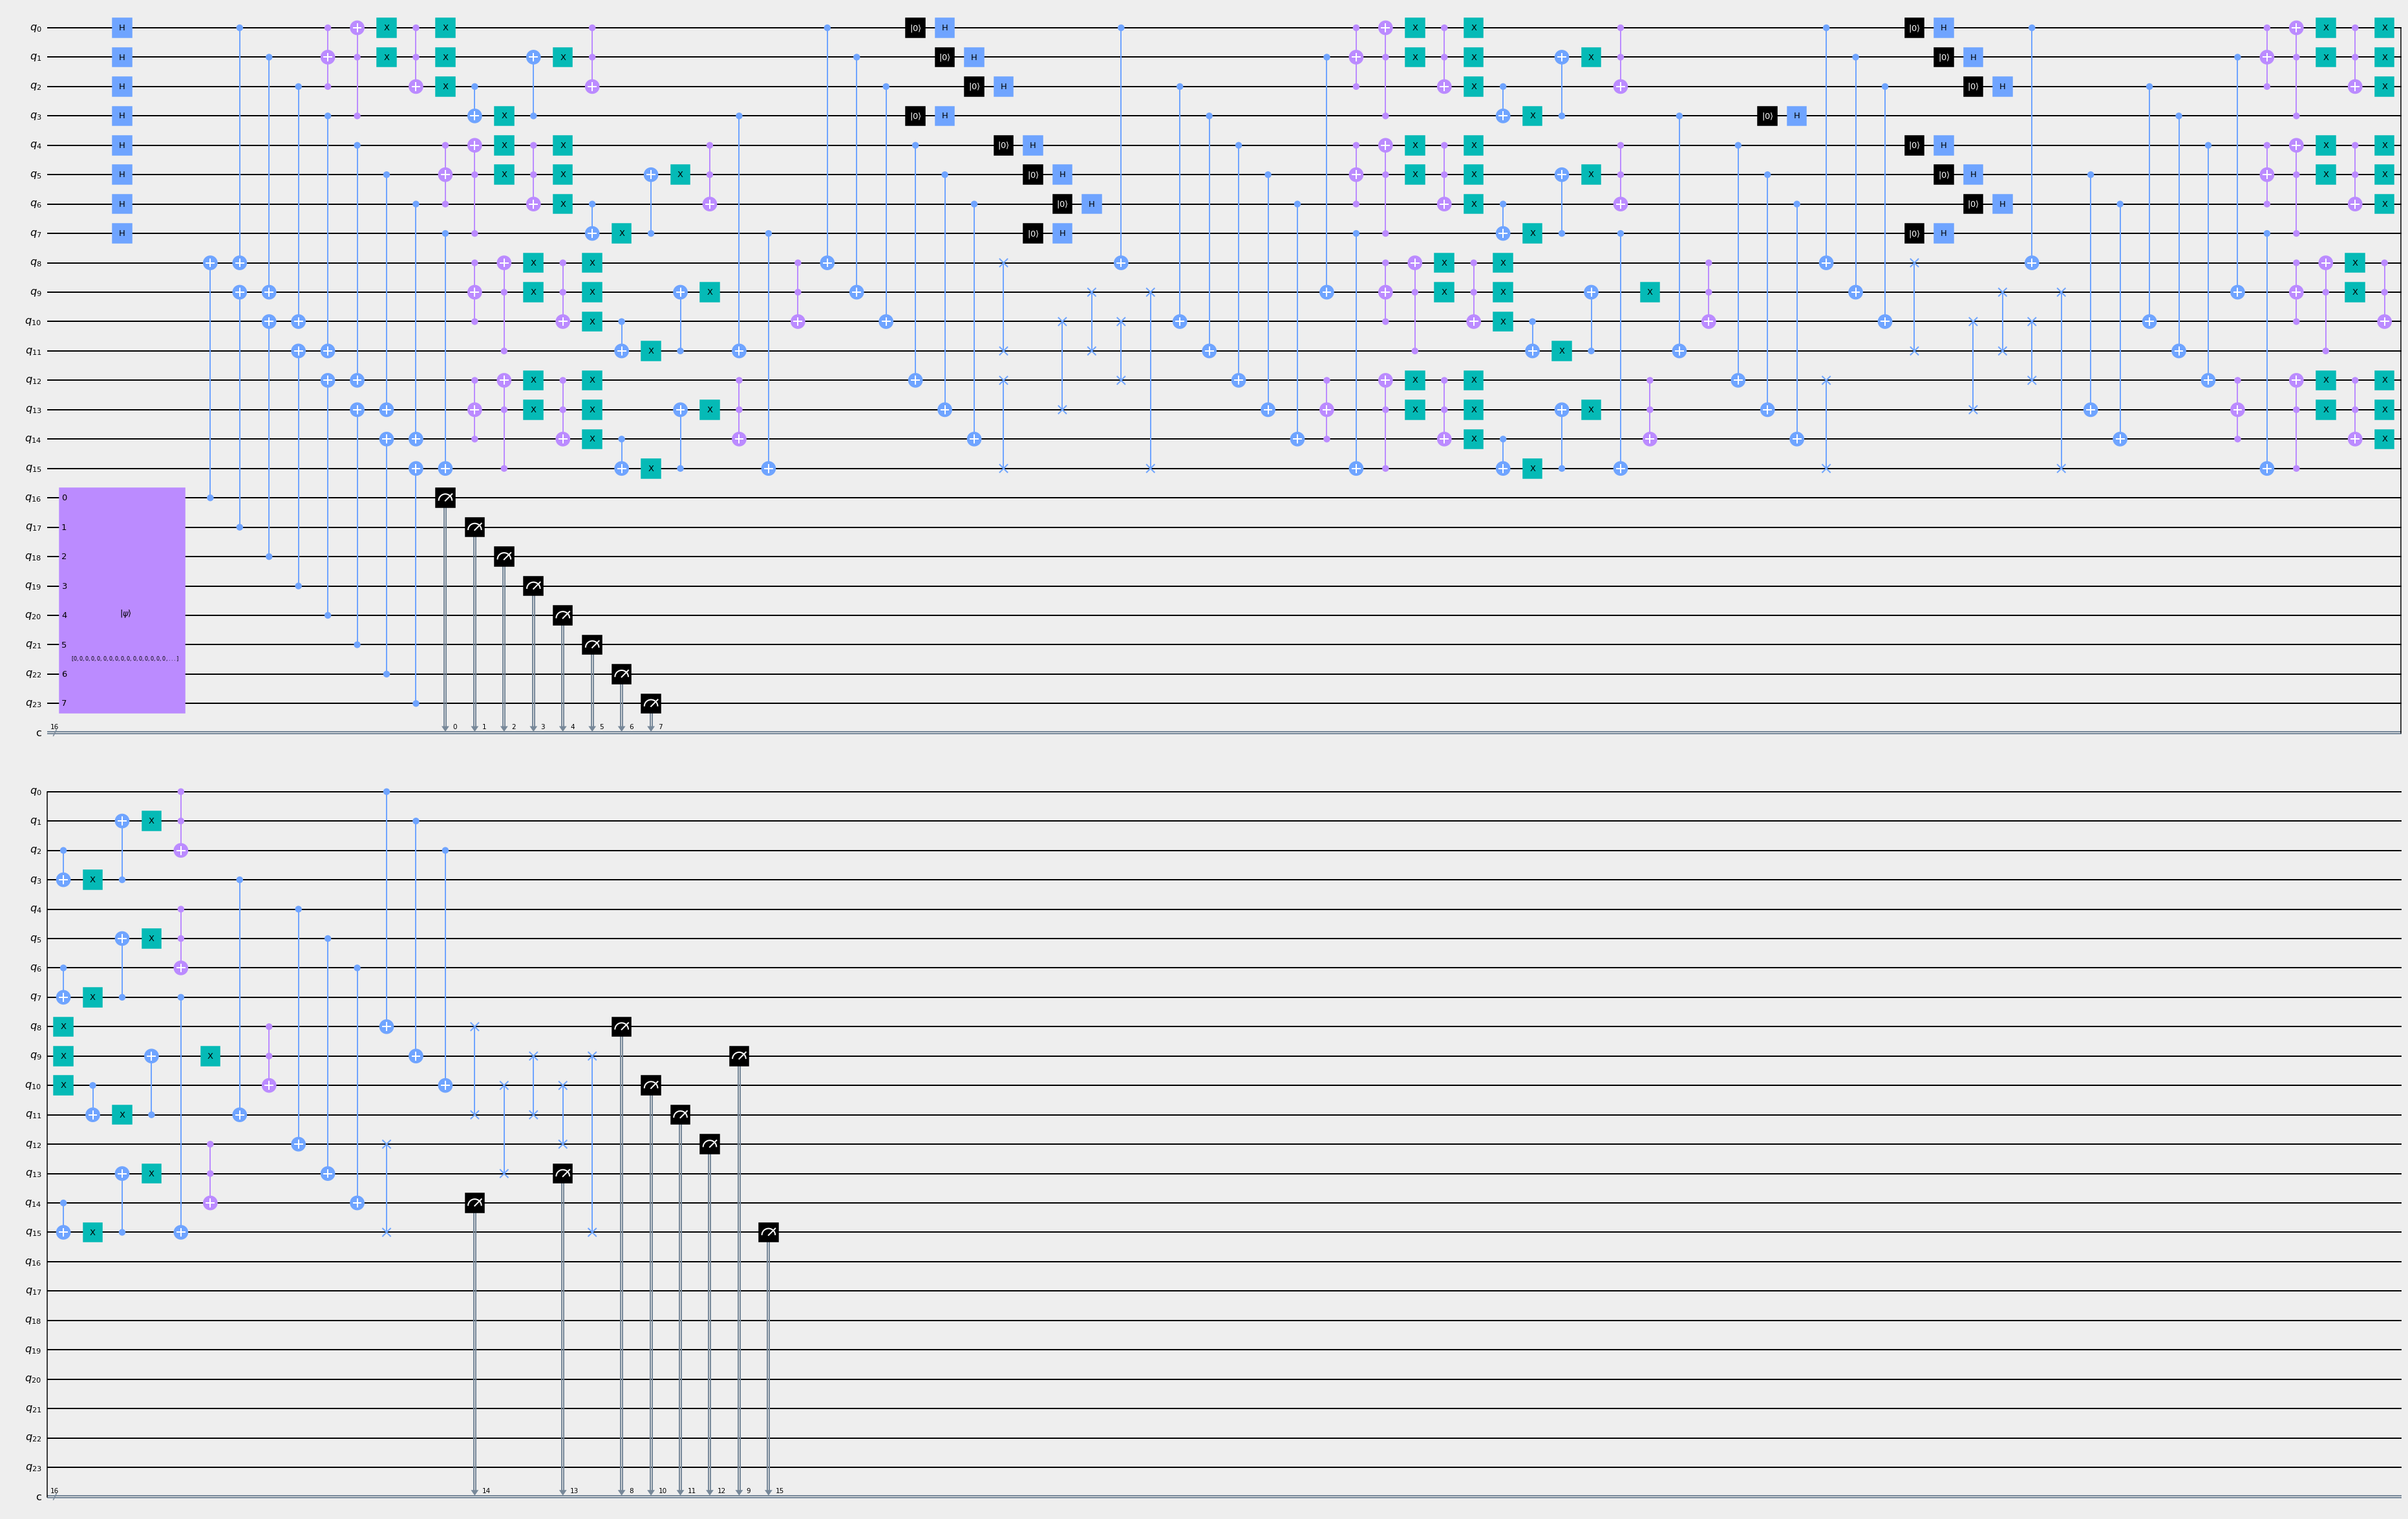

In [3]:
circuit = q_diff_attack(diff_bits="00000001",diff_fix="no",rounds=3,reset=True,block_size=8,Perm=(0,3,5,7,2,4,6,1)) 
circuit_drawer(circuit, output='mpl', style={'backgroundcolor': '#EEEEEE'},plot_barriers=False,fold=80,justify="left",vertical_compression="high")

**Execution of Quantum Circuit for Differential Characteristics Search for 1-round smallGift for all input differences (The output is for one round and number of shots are 100 due to resource limitation)**

In [6]:
Permutation = (0,3,5,7,2,4,6,1)
backend = QasmSimulator(device="GPU")  # or "CPU"
circuit = q_diff_attack(diff_bits="00000001",diff_fix="no",rounds=1,reset=True,block_size=8,Perm=Permutation) # If diff_fix is no then all input difference will be explored
#circuit_drawer(circuit, output='mpl', style={'backgroundcolor': '#EEEEEE'},plot_barriers=False,fold=80,justify="left",vertical_compression="high")
job = execute(circuit, backend, shots=100);
result_sim = job.result()
counts = result_sim.get_counts();
#plot_histogram(counts)
####################To get Probabilities##############################################
#print(dict(sorted(counts.items(), key=lambda item: item[1], reverse=True)))
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[0], reverse=False))
prob_dict = {}
for k, v in sorted_counts.items():
    prob_dict[int(k,2)] = v / sum(sorted_counts.values())
#print(prob_dict)  # Probabilities
print(dict(sorted(prob_dict.items(), key=lambda item: item[1], reverse=True)))  # Sorted Historgram Probabilties

{13421: 0.12, 39277: 0.09, 40301: 0.09, 12397: 0.06, 5485: 0.05, 7277: 0.05, 29293: 0.05, 39021: 0.05, 48493: 0.05, 56685: 0.05, 46445: 0.04, 12909: 0.03, 40045: 0.03, 45933: 0.03, 47469: 0.03, 21357: 0.02, 23149: 0.02, 23661: 0.02, 39533: 0.02, 39789: 0.02, 45421: 0.02, 4461: 0.01, 4973: 0.01, 6253: 0.01, 21869: 0.01, 55917: 0.01, 64365: 0.01}
